# Lab | Data Transformations

In today's lesson, we talked about continuous distributions (mainly normal distribution), linear regression, and how multicollinearity can impact the model. In this lab, we will test your knowledge of those things using the `marketing_customer_analysis.csv` file. You can continue using the same Jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the Jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column `total_claim_amount`. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
- Plot the heatmap of the correlation matrix after the filtering.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')

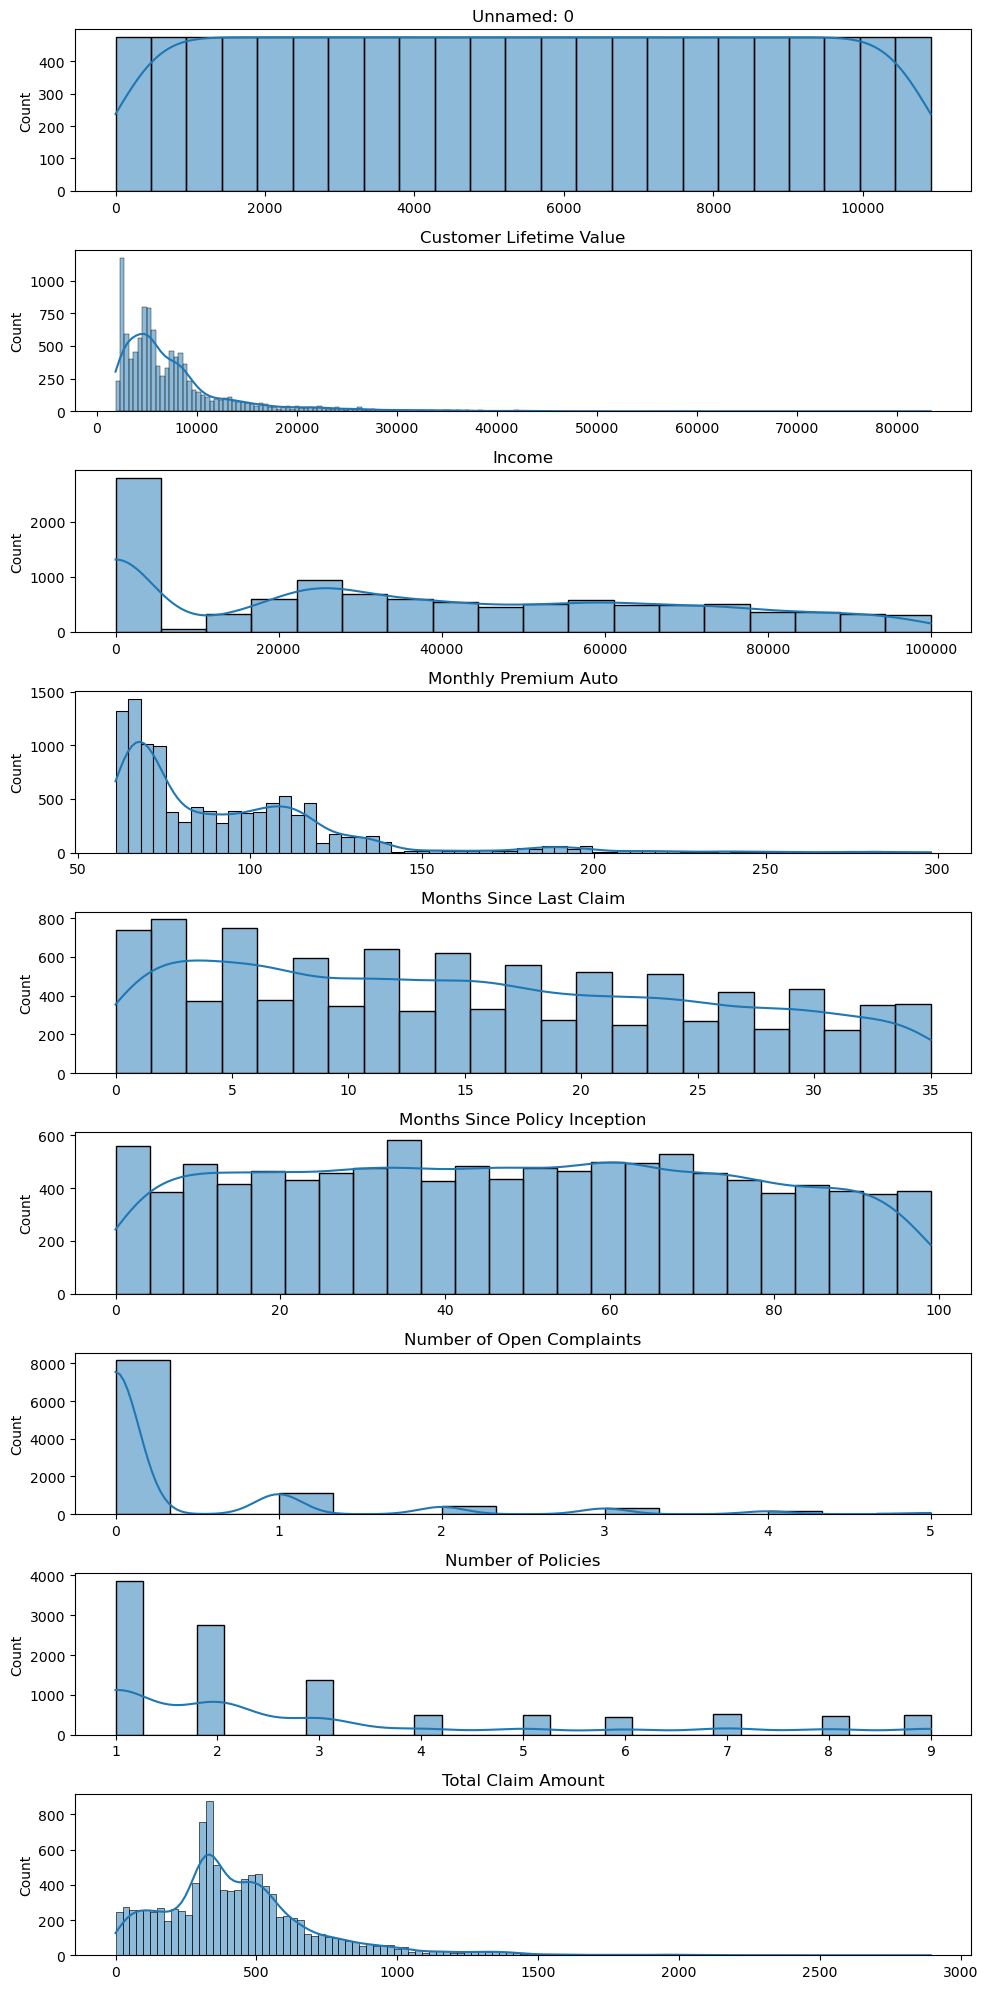

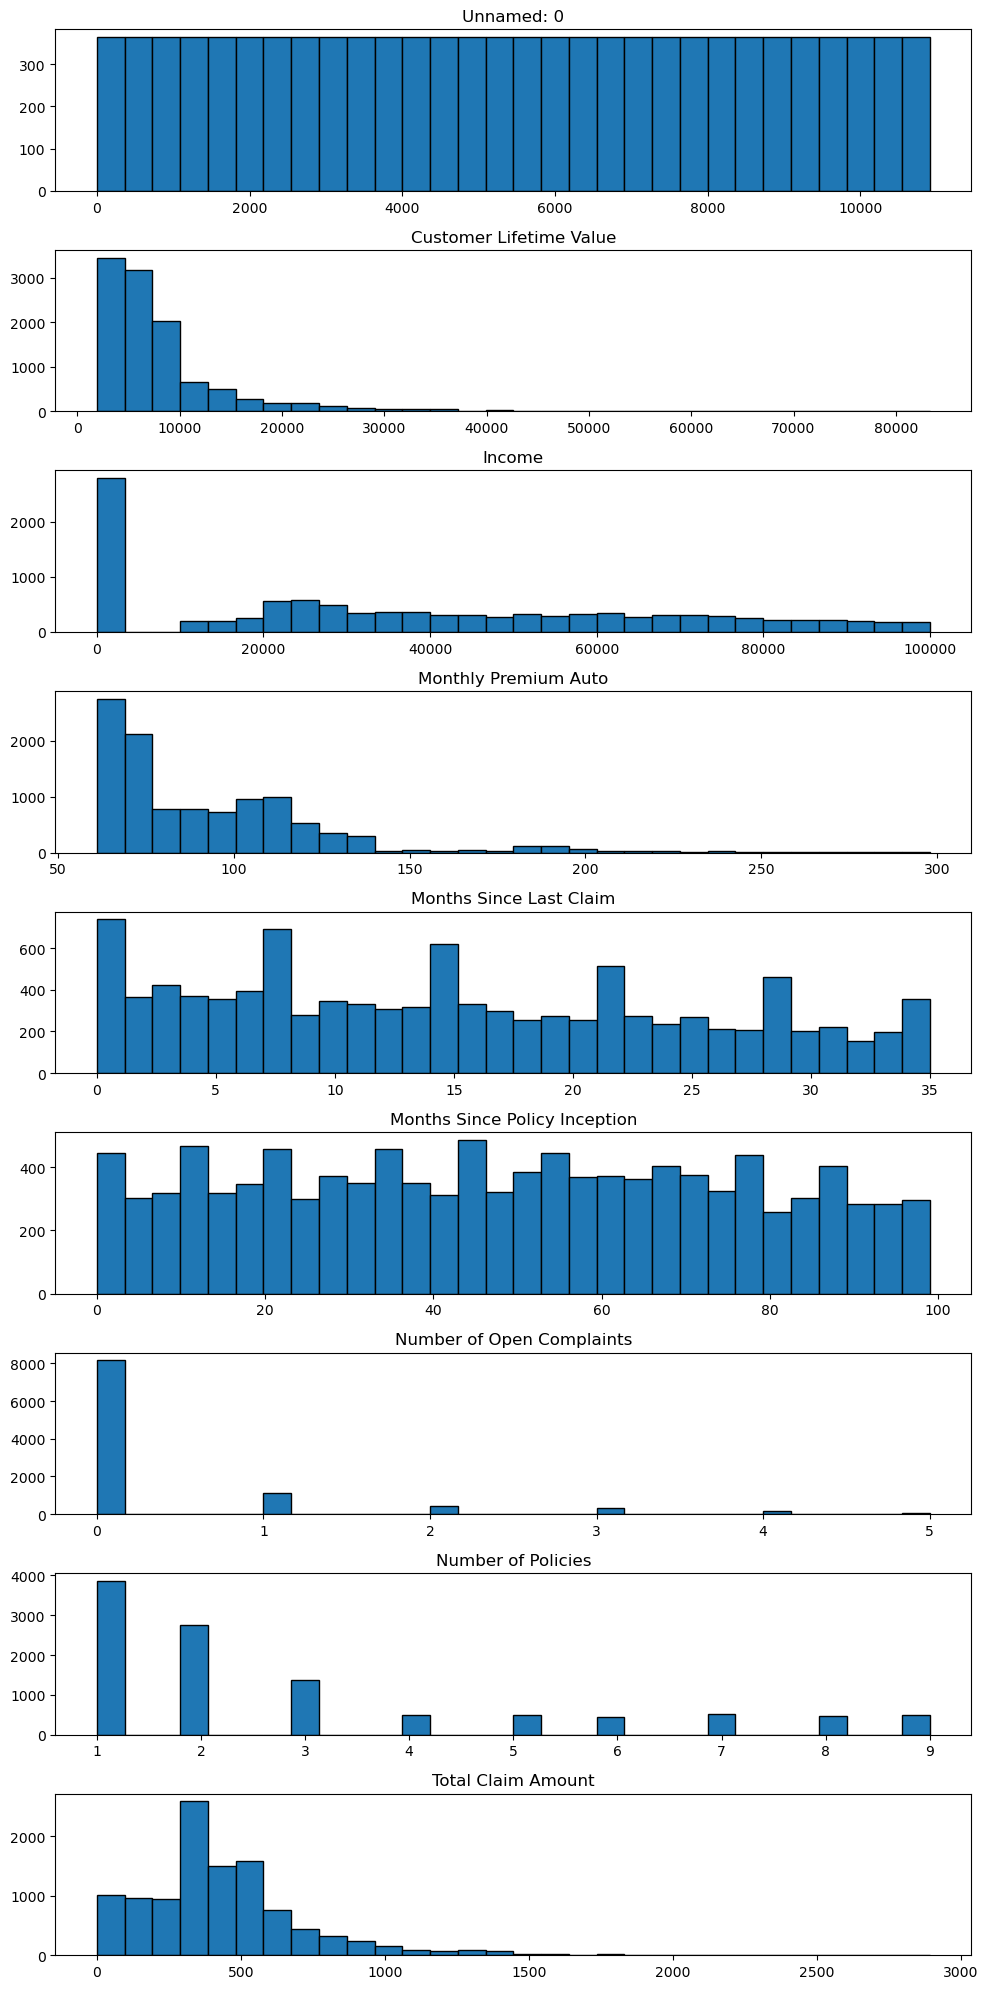

Skewness values:
 Unnamed: 0                       0.000000
Customer Lifetime Value          3.001047
Income                           0.285839
Monthly Premium Auto             2.116567
Months Since Last Claim          0.270327
Months Since Policy Inception    0.033642
Number of Open Complaints        2.803731
Number of Policies               1.242574
Total Claim Amount               1.729286
dtype: float64


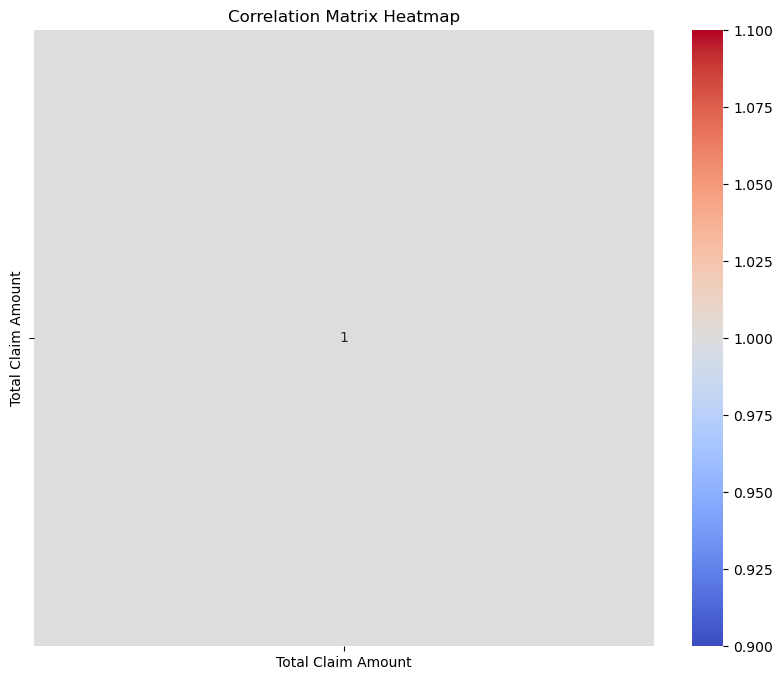

In [2]:
numerical = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=object)

fig, axes = plt.subplots(len(numerical.columns), 1, figsize=(10, 20))
for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(numerical.columns), 1, figsize=(10, 20))
for i, column in enumerate(numerical.columns):
    axes[i].hist(numerical[column], bins=30, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

skewness = numerical.skew()
print("Skewness values:\n", skewness)

correlation_matrix = numerical.corr()

for column in correlation_matrix.columns:
    if column != 'Total Claim Amount':
        if abs(correlation_matrix[column]['Total Claim Amount']) < abs(correlation_matrix[column].drop('Total Claim Amount').max()) and abs(correlation_matrix[column].drop('Total Claim Amount').max()) > 0.9:
            numerical.drop(column, axis=1, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()